In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at

#     http://www.apache.org/licenses/LICENSE-2.0

# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Created by: Melroy Pereira and Nikola Rokvic
# Created date: 27 Dec 2021
# Copyright 2021 InferStat Ltd

In [1]:
import sys 
sys.path.append('../')

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from infertrade.algos.community import allocations
from infertrade.utilities.performance import calculate_portfolio_performance_python
from infertrade_pyfolio.wrapper import InfertradePyfolio

c:\anaconda3\envs\infertradenv\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [3]:
#data
df = yf.download(tickers="AUDUSD=X", start="2010-01-01", end="2020-01-01")
df = df.rename(columns={"Close":"close", "Open":"open", "High":"high",
                        "Low":"low"})
df["date"] = df.index

# strategy function
def buy_on_small_rises(df: pd.DataFrame) -> pd.DataFrame:
    """A rules that buys when the market rose between 2% and 10% from previous close."""
    df_signal = df.copy()
    df_signal["allocation"] = 0.0
    df_signal.loc[df_signal["close"].pct_change(50) >= 0.02, "allocation"] = 0.25
    df_signal.loc[df_signal["close"].pct_change(50) >= 0.05, "allocation"] = 0.5
    df_signal.loc[df_signal["close"].pct_change(50) >= 0.10, "allocation"] = 0.0
    return df_signal

# signal and allocation
df_alloc = buy_on_small_rises(df=df)

# infertrade backtest
df_portfolio = calculate_portfolio_performance_python(df_with_positions=df_alloc)


# index to timestamp
df_portfolio = df_portfolio.set_index("date")

[*********************100%***********************]  1 of 1 completed


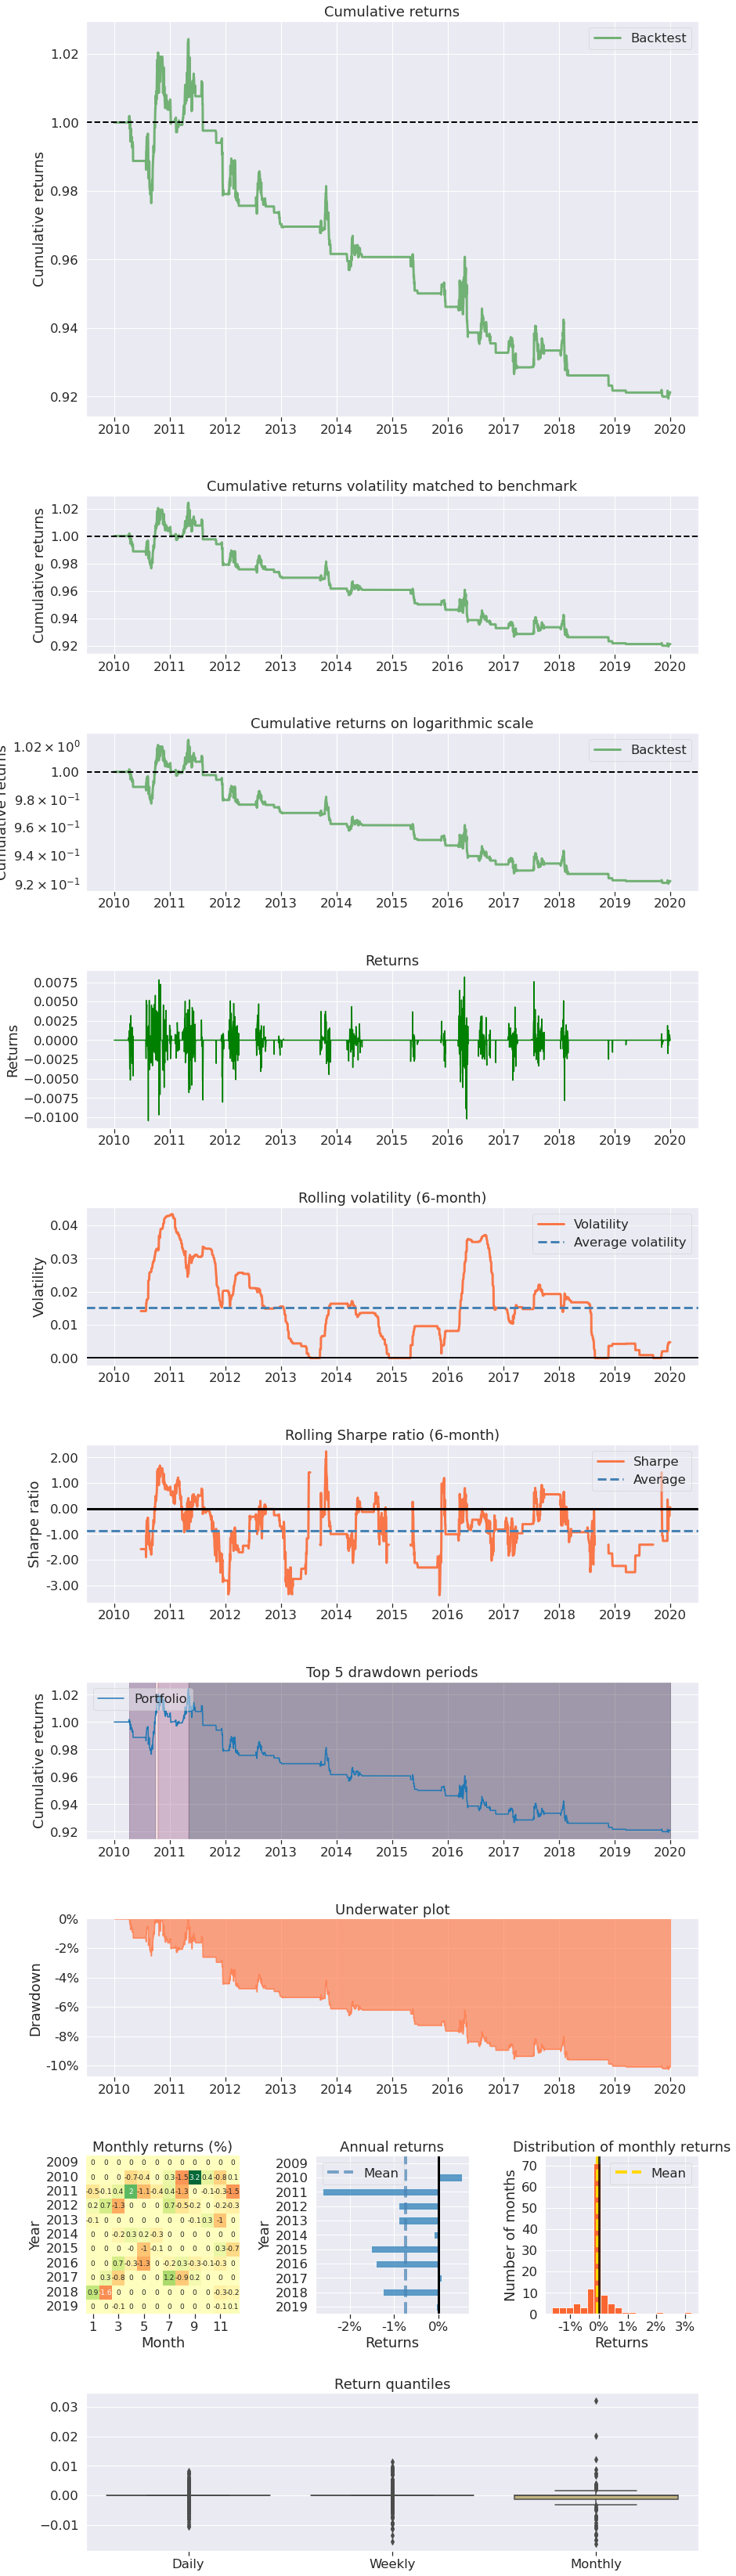

In [12]:
# Return tear sheet 
InfertradePyfolio.infertrade_return_tear_sheet(returns=df_portfolio["portfolio_return"], notebook=True, pdf=False)

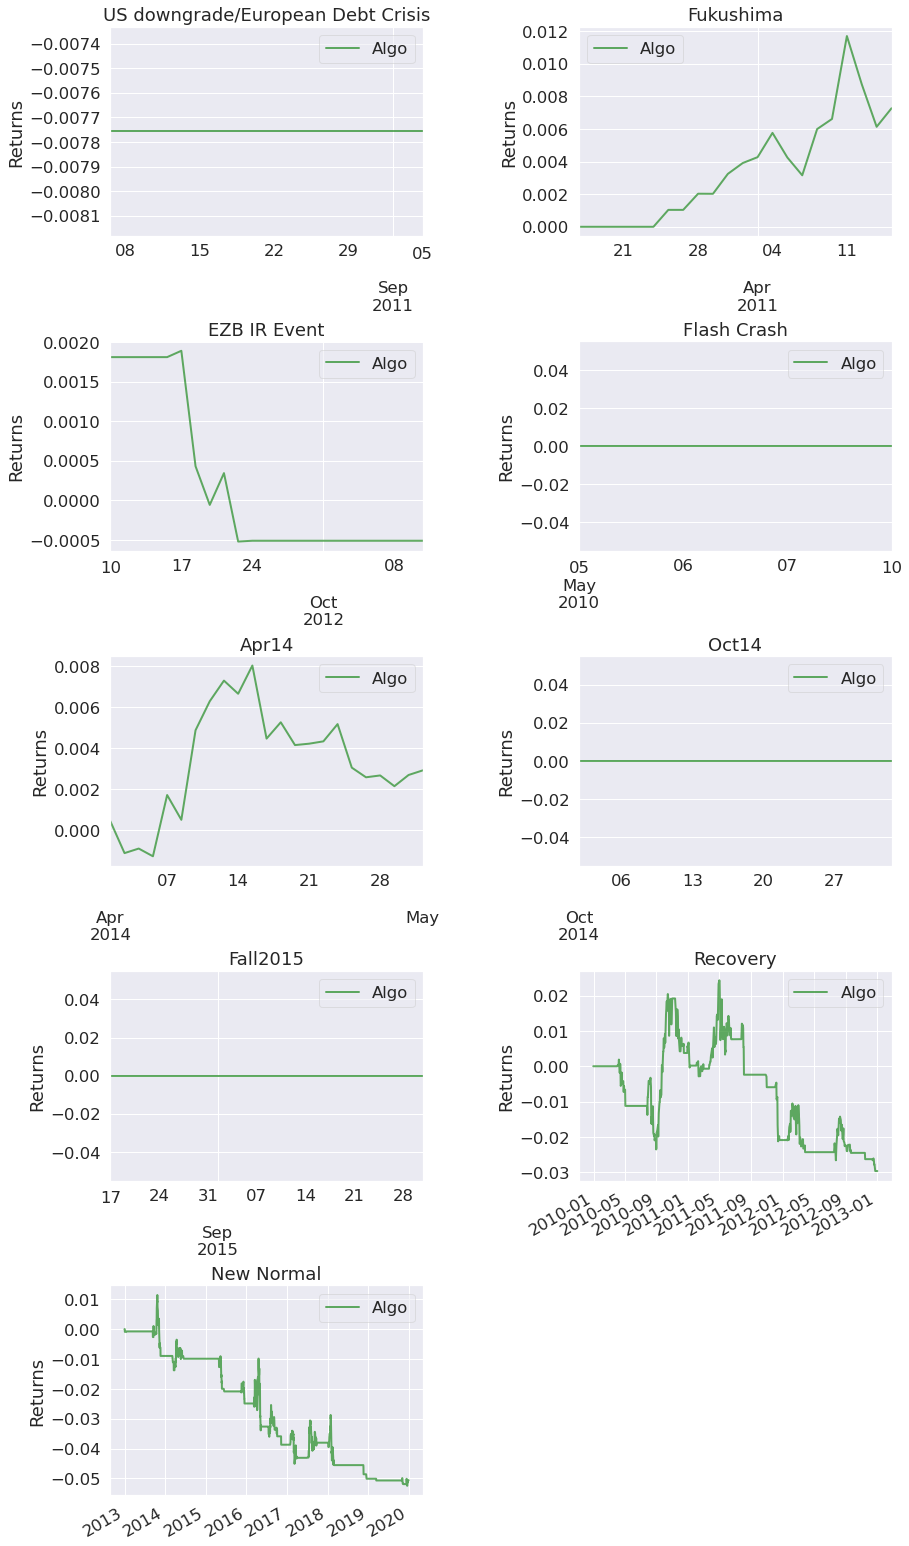

In [11]:
# Intresting time tear sheet
InfertradePyfolio.infertrade_intresting_time_tear_sheet(returns=df_portfolio["portfolio_return"], notebook=True, pdf=False)

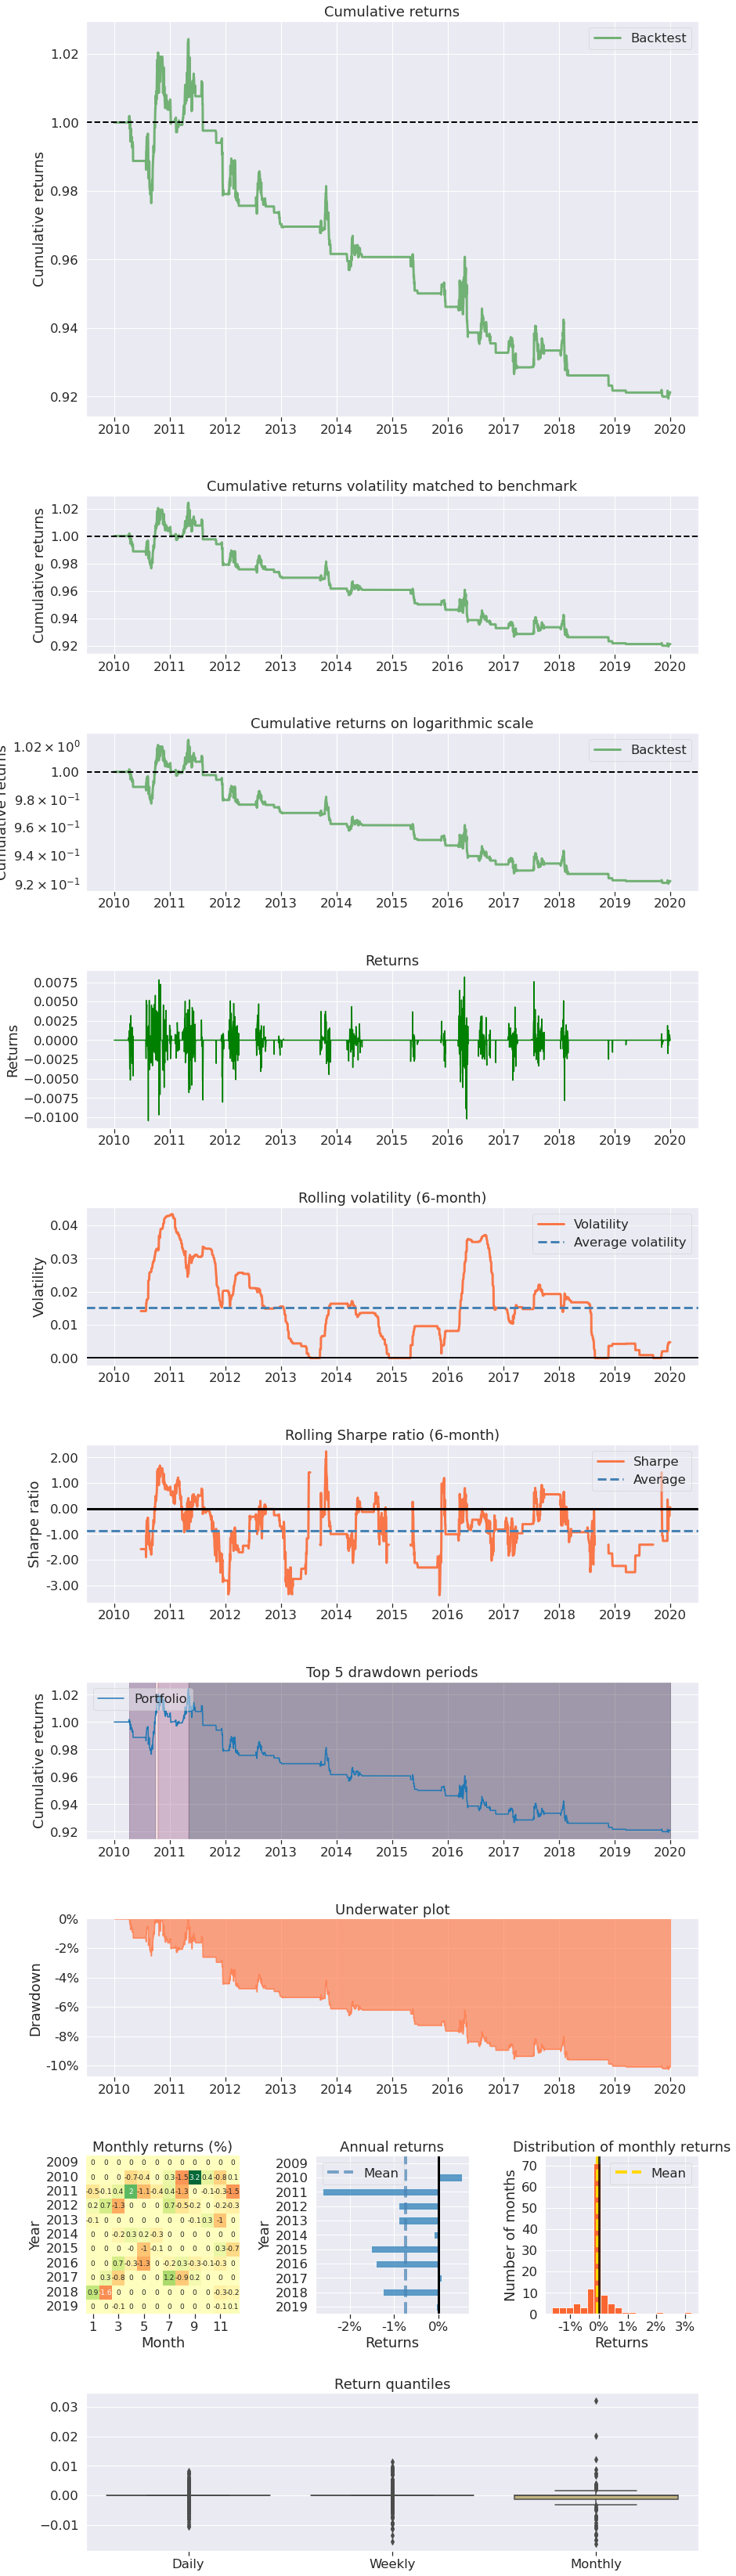

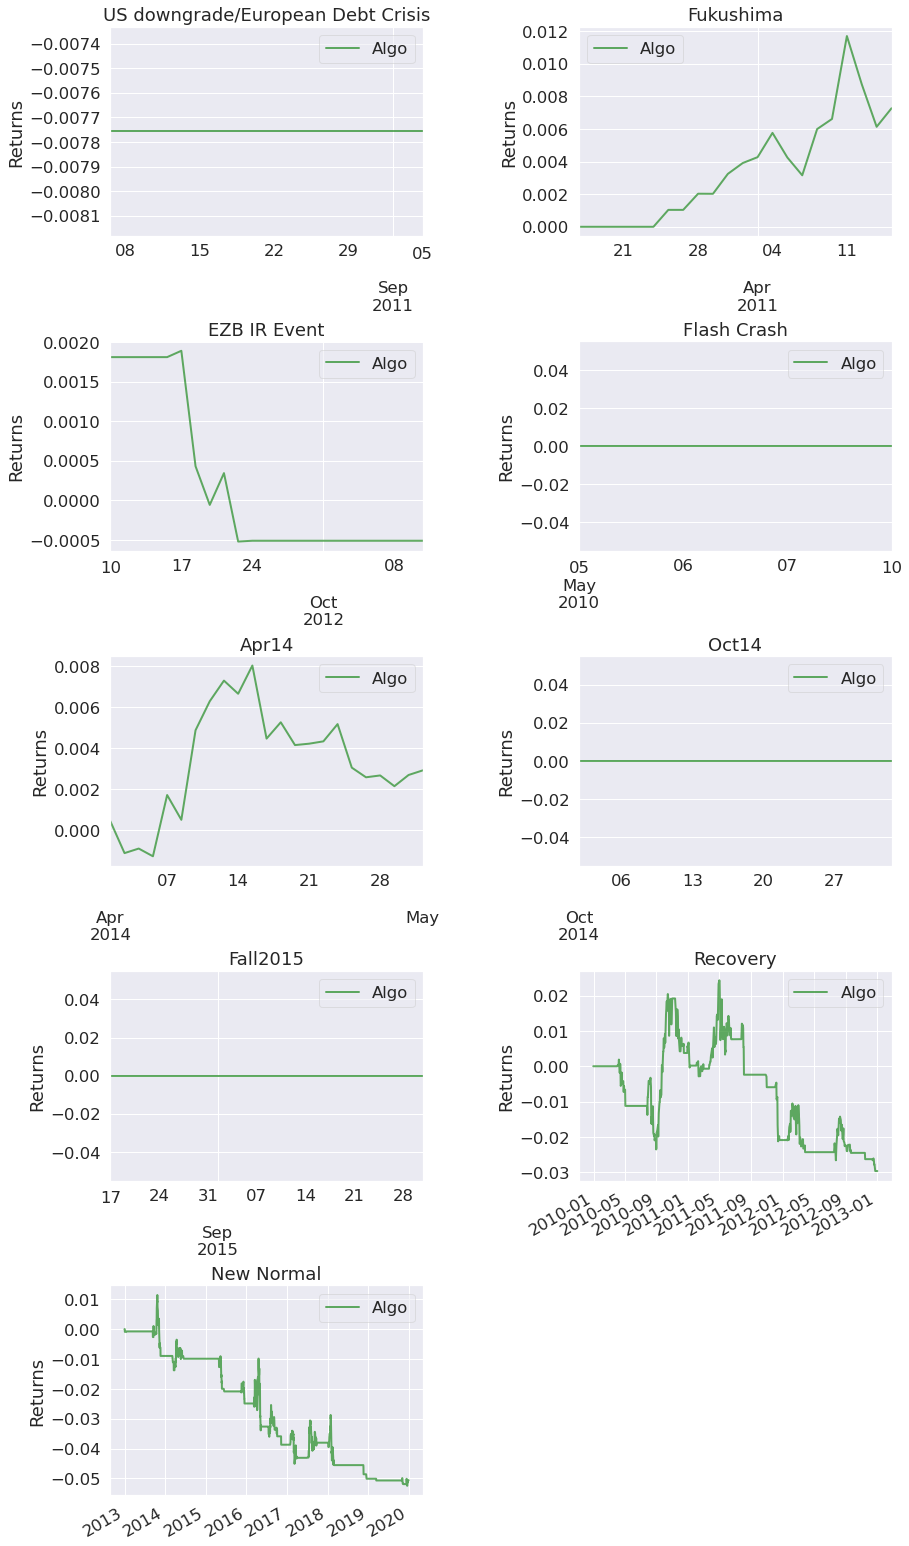

In [10]:
# Full tear sheet
InfertradePyfolio.infertrade_full_tear_sheet(returns=df_portfolio["portfolio_return"], notebook=True, pdf=False)